# Unemployment Data Set with FRED & Pandas
## Viewing 2020 unemployment rate per state in the US (during Covid-19)
* Grabing the unemployment data from FRED
* Renaming the states names to a more understandable values \ acutal state name
* Visuallizing the data per state

## installing the fred api

In [1]:
!pip install fredapi >/dev/null

## Pandas Options

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from fredapi import Fred
import time

# In order for the dataset to work for others,
# they need a fred api key from their site
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("fred_key")

## Fred Key

In [3]:
fred = Fred(api_key=fred_key)

# Unemployment Data
* Searching for an Unemployment Data using the fred api
* Searching the UNRATE id and title
* Cleaning the data
* See unemployment rate in every state

In [4]:
unemp_results = fred.search('unemployment')
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-06-09,2023-06-09,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-06-09,2023-06-09,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-02 07:45:02-05:00,56,The unemployment rate represents the number of...
CCSA,CCSA,2023-06-09,2023-06-09,Continued Claims (Insured Unemployment),1967-01-07,2023-05-27,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-06-08 07:33:03-05:00,77,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-06-09,2023-06-09,Continued Claims (Insured Unemployment),1967-01-07,2023-05-27,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-06-08 07:33:03-05:00,38,"Continued claims, also referred to as insured ..."
NROU,NROU,2023-06-09,2023-06-09,Noncyclical Rate of Unemployment,1949-01-01,2033-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-03-21 15:19:03-05:00,67,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCRUTH5URN,NCRUTH5URN,2023-06-09,2023-06-09,"Unemployment Rate in Rutherford County, NC",1990-01-01,2023-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-31 10:25:05-05:00,6,These data come from the Current Population Su...
KYJEURN,KYJEURN,2023-06-09,2023-06-09,"Unemployment Rate in Jefferson County, KY",1990-01-01,2023-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-31 10:16:02-05:00,6,These data come from the Current Population Su...
FLSTLU5URN,FLSTLU5URN,2023-06-09,2023-06-09,"Unemployment Rate in St. Lucie County, FL",1990-01-01,2023-04-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-05-31 10:20:04-05:00,6,These data come from the Current Population Su...


In [5]:
unrate = fred.get_series ('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
Length: 905, dtype: float64

<Axes: >

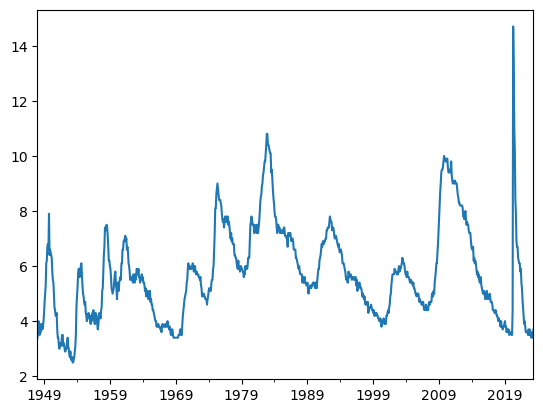

In [6]:
unrate.plot()

# Per State

In [7]:
unrate = fred.search('unemployment state', filter=('frequency', 'Monthly'))
unrate = unrate.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unrate = unrate.loc[unrate['title'].str.contains('Unemployment Rate in')]

# Sorting the unemployment rate into a list by dates

In [8]:
all_results = []

In [9]:
for myid in unrate.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    #time.sleep(0.2) # Don't request to fast and get blocked 
unrate_results = pd.concat(all_results, axis=1)

In [10]:
cols_to_drop = []

In [11]:
for i in unrate_results:
    if len(i) > 4:
        cols_to_drop.append(i)
unrate_results = unrate_results.drop(columns = cols_to_drop, axis=1)

In [12]:
unemp_states = unrate_results.copy() #.drop('UNRATE', axis=1)
unemp_states = unemp_states.dropna()
id_to_state = unrate['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
unemp_states.columns

Index(['California', 'Florida', 'Texas', 'New York', 'Ohio', 'Michigan',
       'Alabama', 'Illinois', 'North Carolina', 'Massachusetts',
       'Pennsylvania', 'Colorado', 'Minnesota', 'Washington', 'Wisconsin',
       'Virginia', 'Georgia', 'Kentucky', 'Oregon', 'Tennessee', 'New Mexico',
       'Arizona', 'Missouri', 'New Jersey', 'Indiana', 'Louisiana',
       'South Carolina', 'Iowa', 'West Virginia', 'Oklahoma', 'Nevada', 'Utah',
       'Arkansas', 'Maryland', 'Hawaii', 'Kansas', 'Alaska', 'North Dakota',
       'Maine', 'Puerto Rico', 'Connecticut', 'Mississippi', 'Nebraska',
       'Rhode Island', 'New Hampshire', 'the District of Columbia', 'Montana',
       'Wyoming', 'South Dakota', 'Delaware', 'Idaho', 'Vermont'],
      dtype='object')

In [13]:
px.line(unemp_states, labels={'variable':'State','index':'Time Period','value':'Unemployment Rate'})

# April 2020 Unemployment Rate Per State

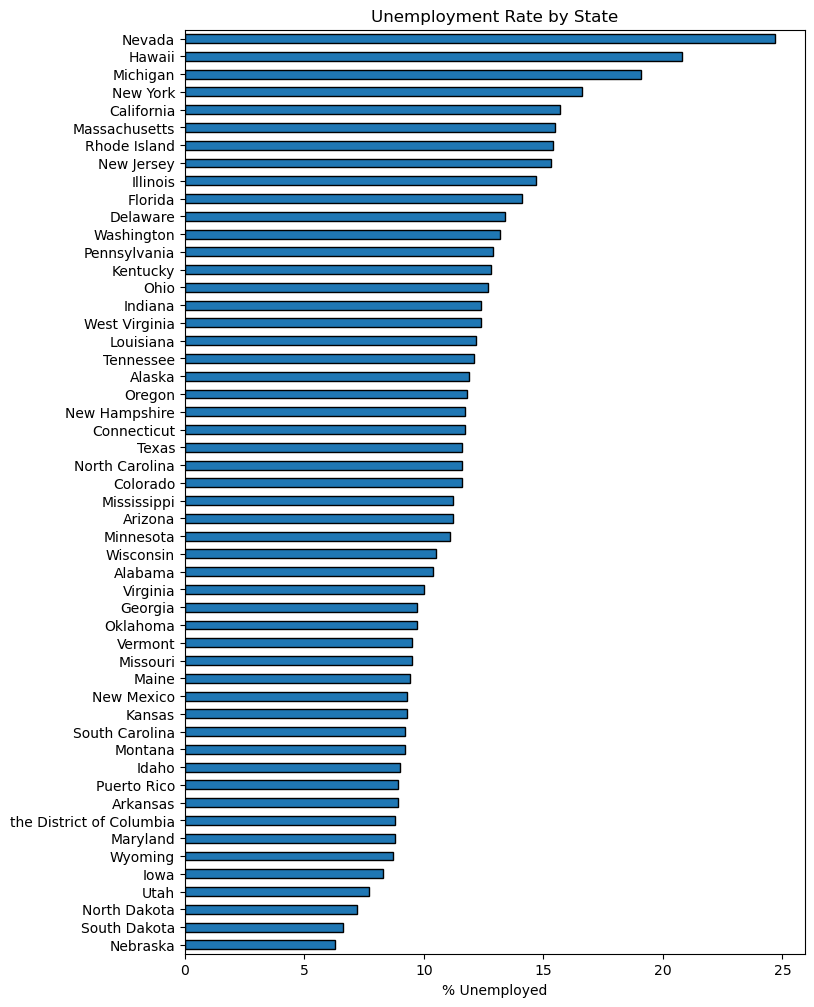

In [14]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='barh', figsize=(8, 12), width=0.5, edgecolor='black',
        title= 'Unemployment Rate by State')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Unemployment Rate by State
* Going through the states and visuallizing them

IndexError: index 50 is out of bounds for axis 0 with size 50

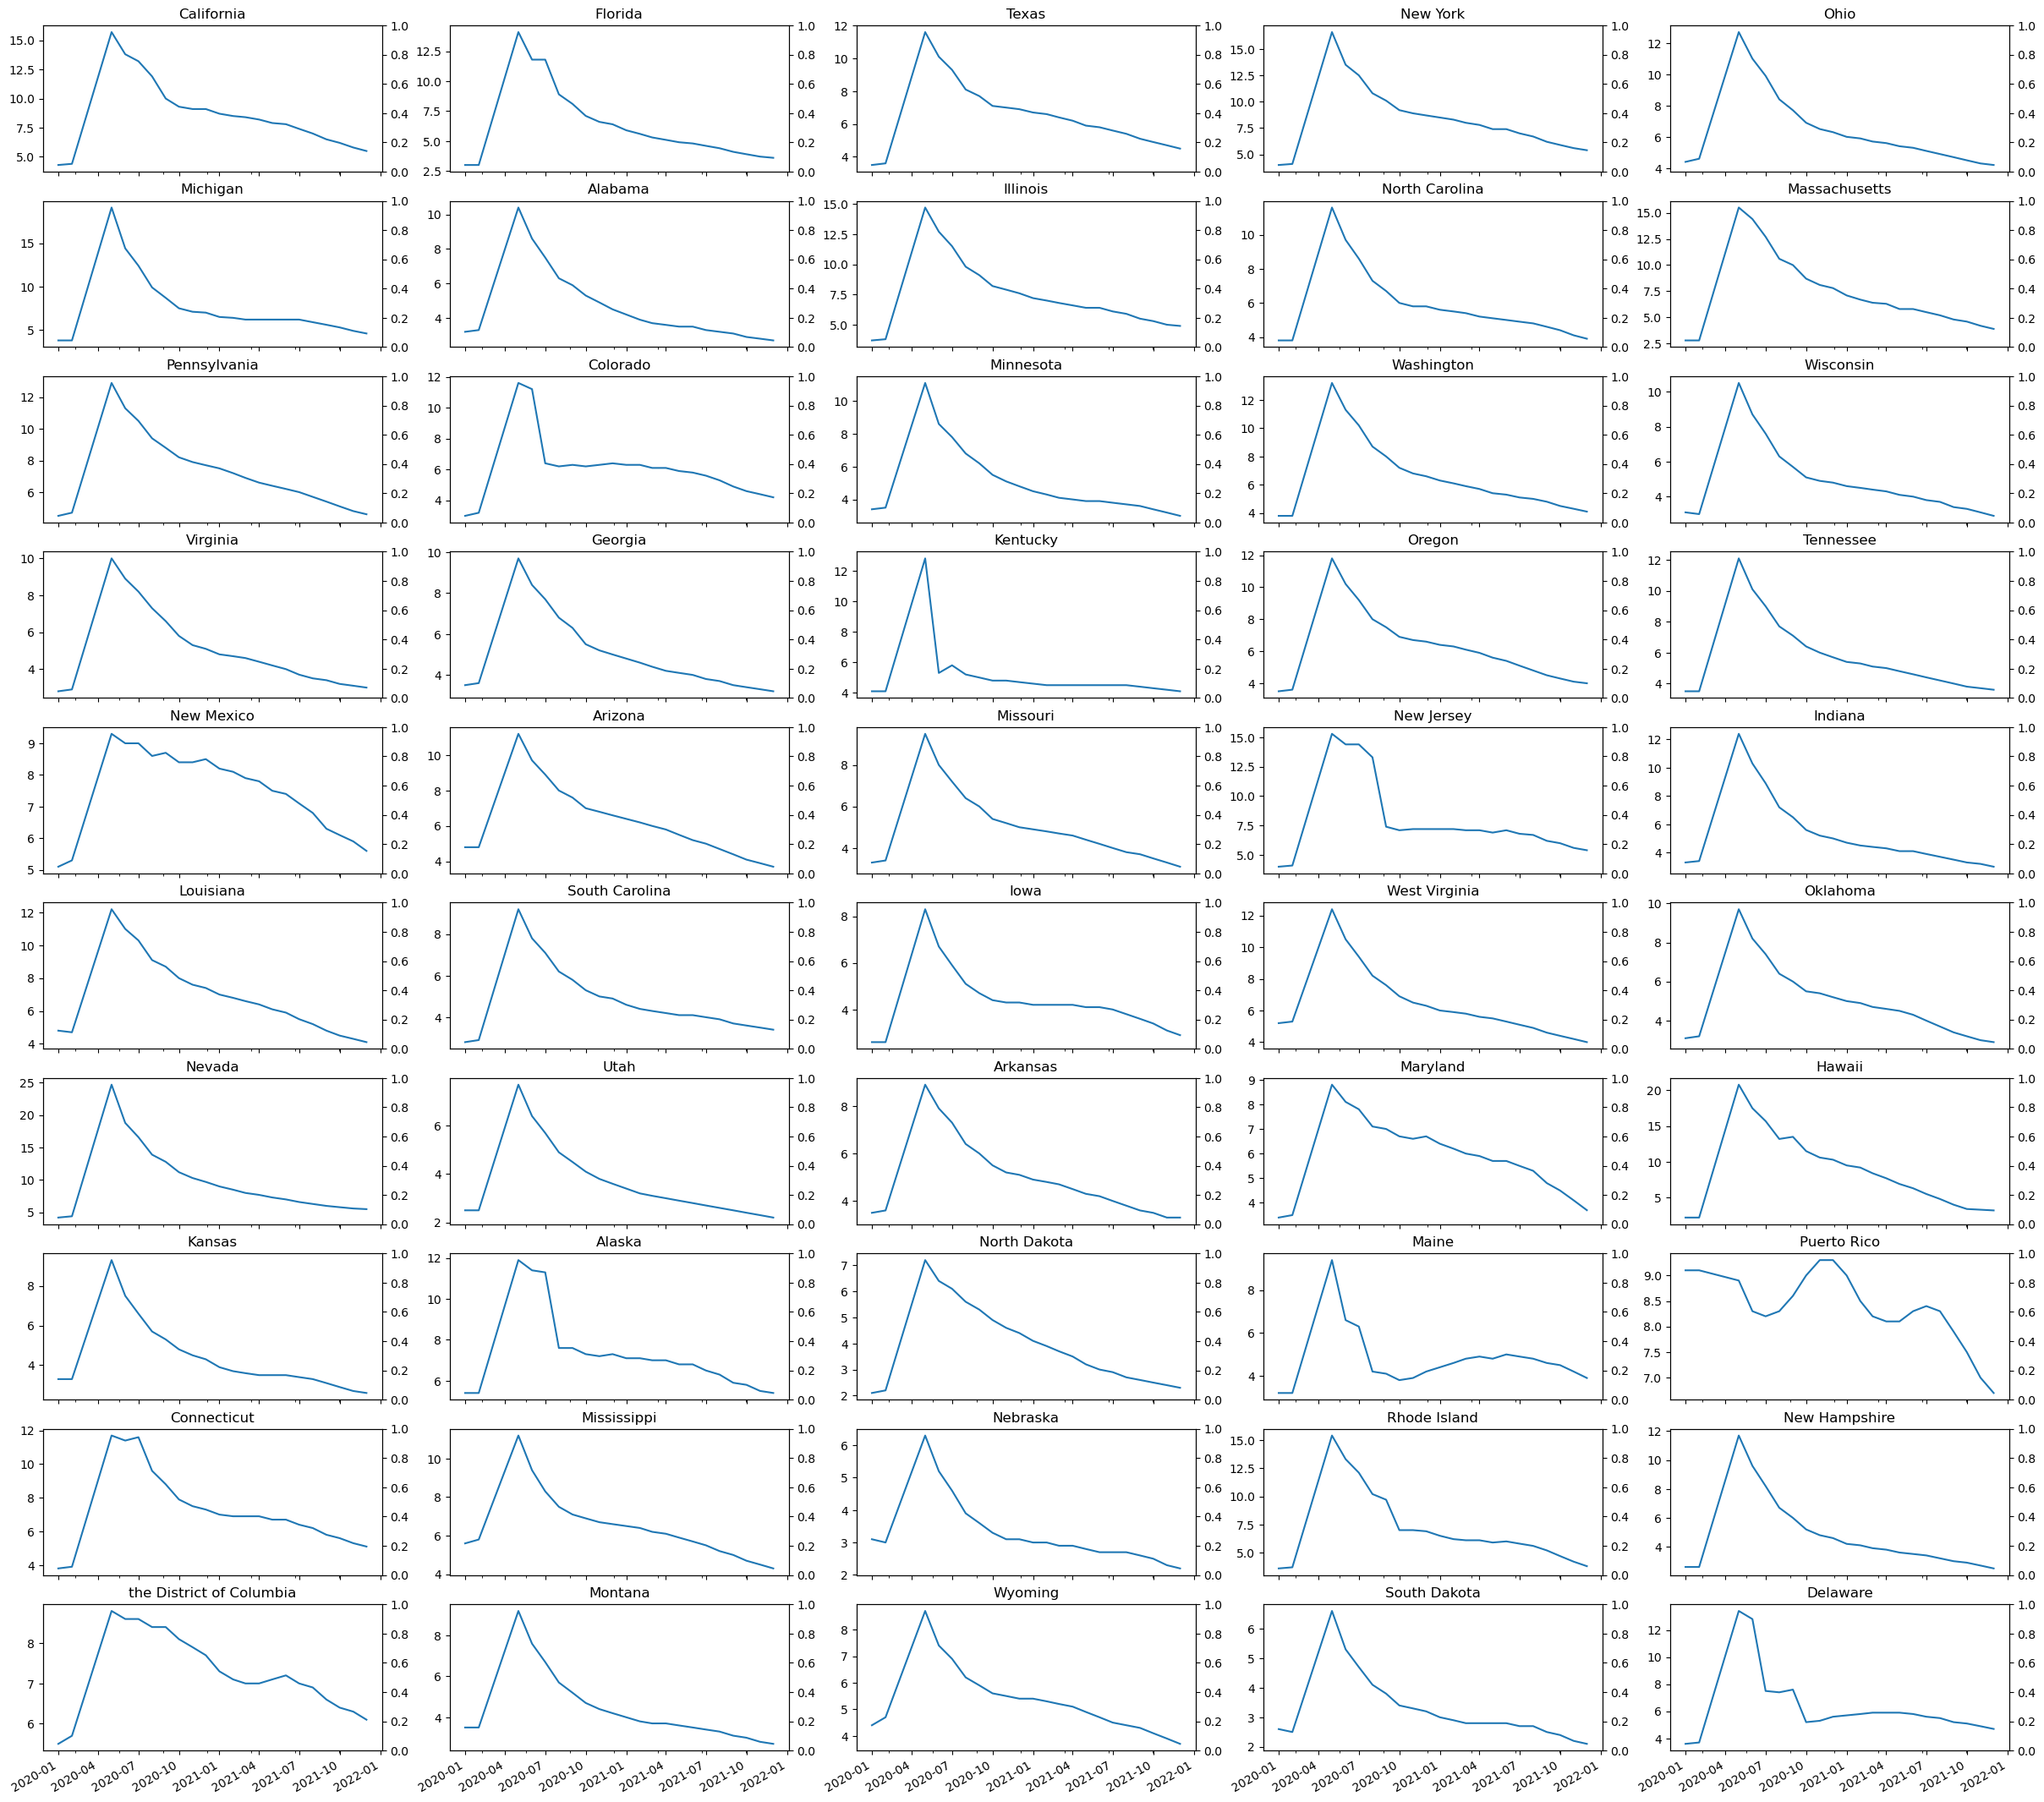

In [15]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()